# A1.2 Regresión lineal simple

La felicidad no es algo fácilmente mensurable, aun así, la publicación  World Happiness Report (WHR) ha tratado desde el 2012 de medir los niveles de felicidad de la gran mayoría de los países del mundo. Los resultados que obtienen año con año se publican de forma abierta, así como los datos que lograron capturar.  

La variable de mayor interés para este ejercicio es el nivel general de felicidad por país, evaluado en una escala del 0 al 10. Una de las variables que en dicho reporte han expuesto como relevante para determinar la felicidad de una nación es su producto interno bruto, o gross domestic product (GDP). Los datos de GDP por país se pueden descargar desde el sitio de The World Bank, una institución financiera internacional.  
 
En  este  caso,  te  presento  un  archivo  de  nombre  “A1.2  Felicidad  y  GDP.csv”  (que  podrás encontrar en la misma página de la plataforma donde descargaste esta plantilla), donde podrás encontrar el nivel de felicidad del último reporte del WHR (2022) y el GDP (2020) de los países para  los  que  se  cuenta  con  información.  Los  datos  de  niveles  de  felicidad  se  descargaron directamente  del  sitio  de  internet  del  WHR,  y  los  datos  de  GDP  se  descargaron  del  sitio  de internet de The World Bank. 
 
La base de datos cuenta con la siguiente información: <br>
 “Pais”. Se describe el nombre del país. <br>
 “Felicidad”. Un número entre 0 y 10 que describe el nivel de felicidad. <br>
 “GDP”. Un número que describe el producto interno bruto.  <br>
Es  momento  de  poner  en  práctica  los  conocimientos  que  hemos adquirido  para  encontrar  un modelo de regresión lineal simple en el que relaciones la felicidad y el GDP de un país. Antes de continuar,  pregúntate:  ¿qué  dirección  crees  que  tendrá  la  asociación  (a  mayor  GDP,  mayor  o menor felicidad)? 
 
Desarrolla los siguientes puntos en una Jupyter Notebook, tratando, dentro de lo posible, que cada punto se trabaje en una celda distinta. Los comentarios en el código siempre son bienvenidos, de preferencia, aprovecha el markdown para generar cuadros de descripción que ayuden al lector a comprender el trabajo realizado. 

1. Importa  los  datos  del  archivo  “Felicidad  y  GDP.csv”  a  tu  ambiente  de  trabajo.  Por curiosidad, revisemos cuáles son los países más felices, así como los que tienen mayor GDP.  Imprime  en  consola  un  resumen  de  10  filas  de  la  base  de  datos,  previamente ordenada  de  mayor  a  menor  felicidad.  Te  recomiendo  que  hagas  uso  de  la  función “sort_values()”, especificando como primer parámetro el nombre de la columna de interés, y el parámetro “ascending” con valor “False”. Repite el proceso, pero ahora ordenando la base de datos de mayor a menor GDP. 

In [31]:
# Importamos librerías que usaremos en la libreta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
%matplotlib inline

In [9]:
# Leemos el archivo con los datos de Felicidad y GDP
data = pd.read_csv("A1.2 Felicidad y GDP.csv")

print("Ordenado de mayor a menor felicidad \n",data.head(10))
print("Ordenado de mayor a menor GDP \n",data.sort_values("GDP", ascending=False).head(10))

Ordenado de mayor a menor felicidad 
           Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11
Ordenado de mayor a menor GDP 
                Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900

2. Grafica las observaciones, definiendo el valor de “y” como el nivel de felicidad y el valor 
de “x” como el logaritmo base 10 del GDP. Típicamente, cuando trabajamos con números 
tan  grandes  como  lo  es  el  GDP,  es  mucho  más  común  encontrar  asociaciones  con  el 
logaritmo  base  10  de  la  variable,  que  con  la  variable  misma.  Esto  no  es  un  problema, 
siempre y cuando nuestra conclusión incluya este recordatorio. Es decir, si descubrimos 
que  sí  existe  una  asociación,  diríamos  que:  “encontramos  una  asociación 
estadísticamente  significativa  entre  los  niveles  de  felicidad  y  el  logaritmo  base  10  del 
GDP”. La librería numpy tiene la función “log10()”, puedes usarla para transformar el GDP. 


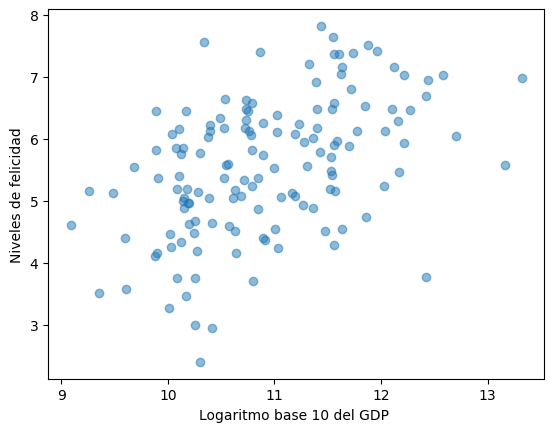

In [ ]:
# Definimos "x" y "y" como el logaritmo base 10 del GDP y la felicidad de los Países
y = data.Felicidad
x = np.log10(data.GDP)

# Graficamos observaciones
plt.scatter(x, y, alpha = 0.5)

plt.ylabel("Niveles de felicidad")
plt.xlabel("Logaritmo base 10 del GDP ")

plt.show()

3. Calcula los valores óptimos de los dos coeficientes del modelo de regresión lineal simple. 
Realiza este proceso “a mano”, sin apoyarte con funciones preestablecidas de librerías 
de análisis de datos. Al finalizar, imprime en consola ambos valores. Siempre es bueno 
especificar qué es el valor que estamos imprimiendo, por lo que te recomiendo usar una 
sintaxis similar a: print(“B1 =”, B1). 

In [14]:
xBar = np.mean(x)
yBar = np.mean(y)

# Separamos B1 en numerador y denominador para facilitar el calculo
B1num = sum((x-xBar)*(y-yBar))
B1den = sum((x-xBar)**2)
B1 = B1num / B1den

B0 = yBar - (B1*xBar)

print("B0 =",B0)
print("B1 =",B1)

B0 = -1.3023500570747277
B1 = 0.6281284658810408


4. Realiza una nueva gráfica en la que se muestren tanto las observaciones, como la línea 
que  representa  el  modelo  de  regresión  lineal  simple.  Te  recomiendo  usar  un  valor  de 
transparencia de 0.75, tanto para las observaciones como para la línea.

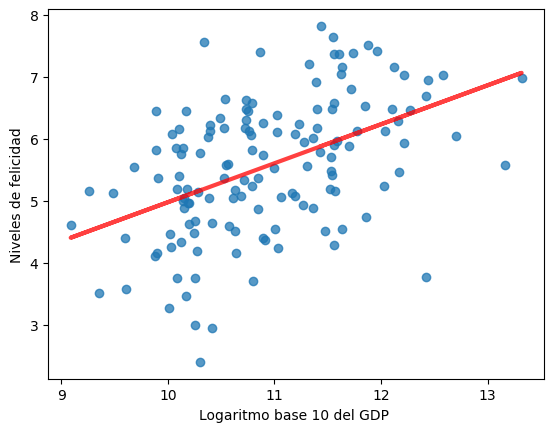

In [15]:
plt.scatter(x, y, alpha = 0.75)

plt.ylabel("Niveles de felicidad")
plt.xlabel("Logaritmo base 10 del GDP ")

# Usando x, B0, y B1, guardamos el valor de Y estimada en una variable de nombre yHat
yHat = B0 + B1*x

plt.plot(x, yHat, c="r", linewidth=3, alpha=0.75)

plt.show()

5. Calcula el RSS del modelo e imprímelo en la consola.

In [16]:
RSS = sum((y-yHat)**2)
print("RSS =", RSS)

RSS = 131.3738317732635


6. Calcula el error estándar e intervalo de confianza de 𝛽̂1, e imprime dichos valores en la 
consola. Siempre es bueno especificar qué es el valor que estamos imprimiendo, por lo 
que te recomiendo usar una sintaxis similar a: print(“SE =”, SE). Asimismo, determina si 
la asociación entre la felicidad y el GDP es significativa en esta población, imprimiendo 
en consola un mensaje que claramente explique el por qué de la afirmación, evidenciado 
por alguna métrica calculada. 

In [26]:
n=len(x)
SEB1 = np.sqrt(RSS / ((n-2)*sum((x-xBar)**2)))

print("Error estándar B1 =",SEB1)



per = st.t.interval(0.95, n-2)[1]

CIlow = B1 - per * SEB1
CIhigh = B1 + per * SEB1

print("Intervalo de confianza: (",CIlow,",",CIhigh,")")



t = B1 / SEB1
p = st.t.sf(abs(t),n-2)*2
print("t-statistic =",t)
print("p-value =",p)


print("""
Ya que el p value es menor que 0.05, podemos decir bajo un estándar de 95% de probabilidad que hay una asociación 
estadística significativa positiva entre el nivel de felicidad y el logaritmo base 10 del GDP
""")


Error estándar B1 = 0.09983378435340727
Intervalo de confianza: ( 0.4307393313073311 , 0.8255176004547504 )
t-statistic = 6.291742519320846
p-value = 3.825717831968765e-09

Ya que el p value es menor que 0.05, podemos decir bajo un estándar de 95% de probabilidad que hay una asociación 
estadística significativa positiva entre el nivel de felicidad y el logaritmo base 10 del GDP



7. Calcula  el  residual  standard  error  y  la  𝑅2  del  modelo,  e  imprime  dichos  valores  en  la 
consola. Para el cálculo de 𝑅2, te recomiendo primero calcular el total sum of squares, o 
TSS. Para el cálculo del mismo, pon mucha atención al orden de los paréntesis, pues no 
es lo mismo sumar el cuadrado de múltiples valores, que sumar múltiples valores y elevar 
el  resultado  al  cuadrado.  Adicionalmente,  agrega  un  comentario,  imprimiéndolo  en 
consola, sobre tu opinión del valor de 𝑅2 obtenido con el modelo. 

In [30]:
RSE=np.sqrt(RSS/(n-2))
TSS=sum((y-yBar)**2)

R2=1-RSS/TSS

print("Residual standard error =",RSE)
print("R^2 =",R2)

print("""
Ya que nuestro R^2 es bastante bajo, sabemos que las variables de entrada solo explican el 22% del comportamiento de la variable de salida.
Esto sugiere que no hay una correlación fuerte entre el logaritmo base 10 del GDP y los niveles de felicidad.
""")

Residual standard error = 0.9721807858537376
R^2 = 0.22166361654970657

Ya que nuestro R^2 es bastante bajo, sabemos que las variables de entrada solo explican el 22% del comportamiento de la variable de salida.
Esto sugiere que no hay una correlación fuerte entre el logaritmo base 10 del GDP y los niveles de felicidad.



8. Finalmente, usa la función “OLS()” de la librería statsmodels.api para verificar que los 
resultados  de  todos  los  puntos  anteriores  son  los  esperados.  Si  el  resumen  de  los 
resultados te entrega un p-value = 0.000, puedes observar el resultado con muchas más 
cifras significativas usando la función “pvalues” de la misma librería. Por ejemplo: si los 
resultados de ajustar el modelo los almacenaste en una variable de nombre “var”, puedes 
usar la siguiente sintaxis: var.pvalues. Por default, el RSE no se muestra en el resumen, 
para  revisarlo  utiliza  la  línea  de  código  print(var.scale**.5),  de  nuevo  asumiendo  que 
almacenaste el resultado en una variable de nombre “var”. 

In [36]:
model = sm.OLS(y,sm.add_constant(x))
results = model.fit()

print(results.summary())
print(results.pvalues)
print("RSE =",results.scale**.5)

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           3.83e-09
Time:                        21:22:26   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2